In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
input_dir = './sample_data/input/arsalan2.jpeg'
img = cv.imread('./sample_data/input/arsalan2.jpeg')
height = 180

In [ ]:
! python --version

In [2]:
face_cascade = cv.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')

In [3]:
faces = face_cascade.detectMultiScale(img,1.3,5)

In [4]:
(x,y,w,h) = faces[0]

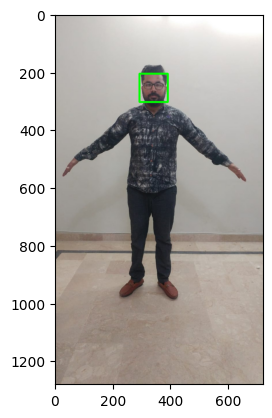

In [5]:
face_img = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))

In [6]:
cv.imwrite('./sample_data/input/face_img.jpg', face_img)

True

In [7]:
# import subprocess
# import os
# import pyttsx3
# import cv2 as cv
# import mediapipe as mp
# from playsound import playsound
# import numpy as np
# import pyttsx3
# import time
# import math
# from numpy.lib import utils
# from matplotlib import pyplot as plt
# # distance from camera to object(face) measured
# # centimeter
# Known_distance = 45

# # width of face in the real world or Object Plane
# # centimeter
# # Known_width = round(faces[0][2] * 0.0264583333,2)
# # print(Known_width)
# Known_width = 14.3

# # Colors
# GREEN = (0, 255, 0)
# RED = (0, 0, 255)
# WHITE = (255, 255, 255)
# BLACK = (0, 0, 0)

# mpPose = mp.solutions.pose
# mpFaceMesh = mp.solutions.face_mesh
# facemesh = mpFaceMesh.FaceMesh(max_num_faces = 1)
# mpDraw = mp.solutions.drawing_utils
# drawing = mpDraw.DrawingSpec(thickness = 1 , circle_radius = 1)
# pose = mpPose.Pose()
# capture = cv.VideoCapture(0)
# lst=[]
# n=0
# scale = 3
# ptime = 0
# count = 0
# brake = 0
# x=150
# y=195
# height = 0

# def speak(audio):

#     engine = pyttsx3.init()
#     voices = engine.getProperty('voices')
#     engine.setProperty('rate',150)

#     engine.setProperty('voice', voices[0].id)
#     engine.say(audio)

#     # Blocks while processing all the currently
#     # queued commands
#     engine.runAndWait()

# # defining the fonts
# fonts = cv.FONT_HERSHEY_COMPLEX

# # face detector object
# face_detector = cv.CascadeClassifier("./opencv/haarcascade_frontalface_default.xml")

# # focal length finder function
# def Focal_Length_Finder(measured_distance, real_width, width_in_rf_image):

#     # finding the focal length
#     focal_length = (width_in_rf_image * measured_distance) / real_width
#     return focal_length

# # distance estimation function
# def Distance_finder(Focal_Length, real_face_width, face_width_in_frame):

#     distance = (real_face_width * Focal_Length)/face_width_in_frame

#     # return the distance
#     return distance


# def face_data(image):

#     face_width = 0 # making face width to zero

#     gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#     plt.imshow(gray_image)

#     # detecting face in the image
#     faces = face_detector.detectMultiScale(gray_image, 1.3, 5)

#     # looping through the faces detect in the image
#     # getting coordinates x, y , width and height
#     for (x, y, h, w) in faces:

#         # draw the rectangle on the face
#         cv.rectangle(image, (x, y), (x+w, y+h), GREEN, 2)

#         # getting face width in the pixels
#         face_width = w

#     # return the face width in pixel
#     return face_width


# # reading reference_image from directory
# ref_image = cv.imread("./sample_data/input/Abdullah.jpeg")

# # find the face width(pixels) in the reference_image
# ref_image_face_width = face_data(ref_image)

# # get the focal by calling "Focal_Length_Finder"
# # face width in reference(pixels),
# # Known_distance(centimeters),
# # known_width(centimeters)
# Focal_length_found = Focal_Length_Finder(
#     Known_distance, Known_width, ref_image_face_width)

# # show the reference image
# # cv.imshow("ref_image", ref_image)

# # initialize the camera object so that we
# # can get frame from it
# cap = cv.VideoCapture(0)

# # looping through frame, incoming from
# # camera/video
# while True:

#     # reading the frame from camera
#     _, frame = cap.read()

#     # calling face_data function to find
#     # the width of face(pixels) in the frame
#     face_width_in_frame = face_data(frame)

#     # check if the face is zero then not
#     # find the distance
#     if face_width_in_frame != 0:
    
#         # finding the distance by calling function
#         # Distance distance finder function need
#         # these arguments the Focal_Length,
#         # Known_width(centimeters),
#         # and Known_distance(centimeters)
#         Distance = Distance_finder(
#             Focal_length_found, Known_width, face_width_in_frame)
        
#         cv.putText(
#             frame, f"Distance: {round(Distance,2)} cms", (30, 35),
#         fonts, 0.6, GREEN, 2)

#         # draw line as background of text
#         cv.line(frame, (30, 30), (230, 30), RED, 32)
#         cv.line(frame, (30, 30), (230, 30), BLACK, 28)
#         Distance = round(Distance)
#         if Distance in range(500 , 550):
#             speak("Stand there and dont move")
#             while True:
#                 isTrue,img = capture.read()
#                 img_rgb = cv.cvtColor(img , cv.COLOR_BGR2RGB)
#                 result = pose.process(img_rgb)
#                 if result.pose_landmarks:
#                     mpDraw.draw_landmarks(img, result.pose_landmarks,mpPose.POSE_CONNECTIONS)
#                     for id,lm in enumerate(result.pose_landmarks.landmark):
#                         lst[n] = lst.append([id,lm.x,lm.y])
#                         n+1
#                         # print(lm.z)
#                         # if len(lst)!=0:
#                         #     print(lst[3])
#                         h , w , c = img.shape
#                         if id == 32 or id==31 :
#                             cx1 , cy1 = int(lm.x*w) , int(lm.y*h)
#                             cv.circle(img,(cx1,cy1),15,(0,0,0),cv.FILLED)
#                             d = ((cx2-cx1)**2 + (cy2-cy1)**2)**0.5
#                             # height = round(utils.findDis((cx1,cy1//scale,cx2,cy2//scale)/10),1)
#                             di = round(d*0.5)
#                             speak(f"You are {di} centimeters tall")
#                             height = di
#                             filename = "./sample_data/input/user_image_" + str(di) + ".jpg"
#                             cv.imwrite(filename, frame)
# #                             speak("Press q.")
# #                             if ord('q'):
# #                                 cv.destroyAllWindows()
# #                             break
                            
#                             dom = ((lm.z-0)**2 + (lm.y-0)**2)**0.5
#                             # height = round(utils.findDis((cx1,cy1//scale,cx2,cy2//scale)/10),1)

#                             cv.putText(img ,"Height : ",(40,70),cv.FONT_HERSHEY_COMPLEX,1,(255,255,0),thickness=2)
#                             cv.putText(img ,str(di),(180,70),cv.FONT_HERSHEY_DUPLEX,1,(255,255,0),thickness=2)
#                             cv.putText(img ,"cms" ,(240,70),cv.FONT_HERSHEY_PLAIN,2,(255,255,0),thickness=2)
#                             cv.putText(img ,"Stand atleast 3 meter away" ,(40,450),cv.FONT_HERSHEY_PLAIN,2,	(0,0,255),thickness=2)
#                             break
#                             # cv.putText(img ,"Go back" ,(240,70),cv.FONT_HERSHEY_PLAIN,2,(255,255,0),thickness=2)
#                         if id == 6:
#                             cx2 , cy2 = int(lm.x*w) , int(lm.y*h)
#                             # cx2 = cx230
#                             cy2 = cy2 + 20
#                             cv.circle(img,(cx2,cy2),15,(0,0,0),cv.FILLED)
#                 img = cv.resize(img , (700,500))
#                 ctime = time.time()
#                 fps = 1/(ctime-ptime)
#                 ptime=ctime
#                 cv.putText(img , "FPS : ",(40,30),cv.FONT_HERSHEY_PLAIN,2,(0,0,0),thickness=2)
#                 cv.putText(img , str(int(fps)),(160,30),cv.FONT_HERSHEY_PLAIN,2,(0,0,0),thickness=2)
#                 cv.imshow("Task",img)
# #                 if cv.waitKey(20) & 0xFF == ord('q'):
# #                     break
#                 break
#             capture.release()
            
#             cv.destroyAllWindows()
            
#             break
#         elif Distance < 500 :
#             speak("Step back")
#         elif Distance > 550:
#             speak("Come a little closer")

#         # Drawing Text on the screen
#         cv.putText(
#             frame, f"Distance: {round(Distance,2)} cms", (30, 35),
#         fonts, 0.6, GREEN, 2)

#     # show the frame on the screen
#     cv.imshow("frame", frame)

#     # quit the program if you press 'q' on keyboard
#     if cv.waitKey(1) == ord("q"):
#         break

# # closing the camera
# cap.release()

# # closing the the windows that are opened
# cv.destroyAllWindows()

In [8]:
import subprocess
import os
import pyttsx3
import cv2 as cv
import mediapipe as mp
from playsound import playsound
import numpy as np
import pyttsx3
import time
import math
from numpy.lib import utils
from matplotlib import pyplot as plt



def speak(audio):

    engine = pyttsx3.init()
    voices = engine.getProperty('voices')
    engine.setProperty('rate',150)

    engine.setProperty('voice', voices[0].id)
    engine.say(audio)

    # Blocks while processing all the currently
    # queued commands
    engine.runAndWait()

In [9]:
import cv2
import subprocess
import os
import pyttsx3
from matplotlib import pyplot as plt
from Body_Detection import find_height

import cv2 as cv
import mediapipe as mp
from playsound import playsound
import numpy as np
import pyttsx3
import time
import math
from numpy.lib import utils
import os
import pickle

height = 0

# distance from camera to object(face) measured
# centimeter
Known_distance = 60.96

# width of face in the real world or Object Plane
# centimeter
Known_width = 14.3

# Colors
GREEN = (0, 255, 0)
RED = (0, 0, 255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
def speak(audio):

    engine = pyttsx3.init()
    voices = engine.getProperty('voices')
    engine.setProperty('rate',150)

    engine.setProperty('voice', voices[0].id)
    engine.say(audio)

    # Blocks while processing all the currently
    # queued commands
    engine.runAndWait()

# defining the fonts
fonts = cv2.FONT_HERSHEY_COMPLEX

# face detector object
face_detector = cv2.CascadeClassifier("./opencv/haarcascade_frontalface_default.xml")


mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(max_num_faces=1)

# focal length finder function
def Focal_Length_Finder(measured_distance, real_width, width_in_rf_image):

    # finding the focal length
    focal_length = (width_in_rf_image * measured_distance) / real_width
    return focal_length

# distance estimation function
def Distance_finder(Focal_Length, real_face_width, face_width_in_frame):

    distance = (real_face_width * Focal_Length)/face_width_in_frame

    # return the distance
    return distance


def face_data(image):

    face_width = 0 # making face width to zero

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detecting face in the image
    faces = face_detector.detectMultiScale(gray_image, 1.3, 5)

    # looping through the faces detect in the image
    # getting coordinates x, y , width and height
    for (x, y, h, w) in faces:

        # draw the rectangle on the face
#         cv2.rectangle(image, (x, y), (x+w, y+h), GREEN, 2)

        # getting face width in the pixels
        face_width = w

    # return the face width in pixel
    return face_width


# reading reference_image from directory
ref_image = cv2.imread("./sample_data/input/Abdullah.jpeg")


# find the face width(pixels) in the reference_image
ref_image_face_width = face_data(ref_image)

# get the focal by calling "Focal_Length_Finder"
# face width in reference(pixels),
# Known_distance(centimeters),
# known_width(centimeters)
Focal_length_found = Focal_Length_Finder(
    Known_distance, Known_width, ref_image_face_width)


# show the reference image
# cv2.imshow("ref_image", ref_image)

# initialize the camera object so that we
# can get frame from it
cap = cv2.VideoCapture(0)

# looping through frame, incoming from
# camera/video
while True:

    # reading the frame from camera
    _, frame = cap.read()

    # calling face_data function to find
    # the width of face(pixels) in the frame
    face_width_in_frame = face_data(frame)

    # check if the face is zero then not
    # find the distance
    if face_width_in_frame != 0:
    
        # finding the distance by calling function
        # Distance distance finder function need
        # these arguments the Focal_Length,
        # Known_width(centimeters),
        # and Known_distance(centimeters)
        Distance = Distance_finder(
            Focal_length_found, Known_width, face_width_in_frame)

        # draw line as background of text
#         cv2.line(frame, (30, 30), (230, 30), RED, 32)
#         cv2.line(frame, (30, 30), (230, 30), BLACK, 28)
        Distance = round(Distance)
        if Distance in range(520 , 570):
            speak("Stand there and dont move")
            height = find_height()
            filename = "./sample_data/input/user_image_" + ".jpg"
            cv.imwrite(filename, frame)
            break
        elif Distance < 570 :
            speak("Step back")
        else:
            speak("Come a little closer")

        # Drawing Text on the screen
#         cv2.putText(
#             frame, f"Distance: {round(Distance,2)} cms", (30, 35),
#         fonts, 0.6, GREEN, 2)

    # show the frame on the screen
    cv2.imshow("frame", frame)

    # quit the program if you press 'q' on keyboard
    if cv2.waitKey(1) == ord("q"):
        break

# closing the camera
cap.release()

# closing the the windows that are opened
cv2.destroyAllWindows()

In [10]:
speak("You can relax now")

In [11]:
input_dir='./sample_data/input/user_image_.jpg'  #Path to Test Image
model_dir = 'deeplab_model' #dir to save DeepLab model (For Image Segmentation)
pretrain='models'

In [12]:
# import os
# if os.path.exists(pretrain) is False:
#   print("Downloading PreTrained Model")

#   !python -m wget https://people.eecs.berkeley.edu/~kanazawa/cachedir/hmr/models.tar.gz && tar -xf models.tar.gz
# else:
#     print('PreTrained Model Already Downloaded')


In [13]:
# !python -m wget https://github.com/farazBhatti/Human-Body-Measurements-using-Computer-Vision/files/5886235/customBodyPoints.txt -o data/customBodyPoints.txt

In [14]:
# pip install bottleneck

In [15]:
# pip install kiwisolver

In [16]:
# import kiwisolver
# print(kiwisolver.__version__)

In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
from io import BytesIO
from absl import flags
from sklearn.preprocessing import StandardScaler

import src.config
import sys
import tarfile
import tempfile

from six.moves import urllib


import numpy as np
from PIL import Image
import cv2, pdb, glob, argparse
import tensorflow as tf

from os.path import exists

from src.tf_smpl import projection as proj_util
from src.tf_smpl.batch_smpl import SMPL
from src.models import get_encoder_fn_separate
import extract_measurements
import cv2
import skimage.io as io

from src.util import renderer as vis_util
from src.util import image as img_util
from src.util import openpose as op_util
from matplotlib import pyplot as plt
import math

C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\tensorflow\python\framework

In [18]:
class DeepLabModel(object):
	"""Class to load deeplab model and run inference."""

	INPUT_TENSOR_NAME = 'ImageTensor:0'
	OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
	INPUT_SIZE = 513
	FROZEN_GRAPH_NAME = 'frozen_inference_graph'

	def __init__(self, tarball_path):
		#"""Creates and loads pretrained deeplab model."""
		self.graph = tf.Graph()
		graph_def = None
		# Extract frozen graph from tar archive.
		tar_file = tarfile.open(tarball_path)
		for tar_info in tar_file.getmembers():
			if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
				file_handle = tar_file.extractfile(tar_info)
				graph_def = tf.GraphDef.FromString(file_handle.read())
				break

		tar_file.close()

		if graph_def is None:
			raise RuntimeError('Cannot find inference graph in tar archive.')

		with self.graph.as_default():
			tf.import_graph_def(graph_def, name='')

		self.sess = tf.Session(graph=self.graph)

	def run(self, image):
		"""Runs inference on a single image.

		Args:
		  image: A PIL.Image object, raw input image.

		Returns:
		  resized_image: RGB image resized from original input image.
		  seg_map: Segmentation map of `resized_image`.
		"""
		width, height = image.size
		resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
		target_size = (int(resize_ratio * width), int(resize_ratio * height))
		resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
		batch_seg_map = self.sess.run(
			self.OUTPUT_TENSOR_NAME,
			feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
		seg_map = batch_seg_map[0]
		return resized_image, seg_map

def create_pascal_label_colormap():
	"""Creates a label colormap used in PASCAL VOC segmentation benchmark.

	Returns:
	A Colormap for visualizing segmentation results.
	"""
	colormap = np.zeros((256, 3), dtype=int)
	ind = np.arange(256, dtype=int)

	for shift in reversed(range(8)):
		for channel in range(3):
			colormap[:, channel] |= ((ind >> channel) & 1) << shift
		ind >>= 3
	return colormap

def label_to_color_image(label):
	"""Adds color defined by the dataset colormap to the label.

	Args:
	label: A 2D array with integer type, storing the segmentation label.

	Returns:
	result: A 2D array with floating type. The element of the array
	  is the color indexed by the corresponding element in the input label
	  to the PASCAL color map.

	Raises:
	ValueError: If label is not of rank 2 or its value is larger than color
	  map maximum entry.
	"""
	if label.ndim != 2:
		raise ValueError('Expect 2-D input label')

	colormap = create_pascal_label_colormap()

	if np.max(label) >= len(colormap):
		raise ValueError('label value too large.')

	return colormap[label]





def preprocess_image(img_path, json_path=None):
    img = img_path#io.imread(img_path)
    print("$$$$$$$",img.shape)
    if img.shape[2] == 4:
        img = img[:, :, :3]

    if json_path is None:
        if np.max(img.shape[:2]) != 224:
#            print('Resizing so the max image size is %d..' % config.img_size)
            scale = (float(224) / np.max(img.shape[:2]))
        else:
            scale = 1.
        center = np.round(np.array(img.shape[:2]) / 2).astype(int)
        # image center in (x,y)
        center = center[::-1]
    else:
        scale, center = op_util.get_bbox(json_path)

    crop, proc_param = img_util.scale_and_crop(img, scale, center,
                                               224)

    # Normalize image to [-1, 1]
    crop = 2 * ((crop / 255.) - 0.5)

    return crop, proc_param, img


def main(img_path, height, json_path=None):
#    renderer = vis_util.SMPLRenderer(face_path='src/tf_smpl/smpl_faces.npy')
    sess = tf.Session()
    model = RunModel(sess=sess)
#    cv2.imshow('input image for measurement extraction',img_path)
#    cv2.waitKey(0)

    input_img, proc_param, img = preprocess_image(img_path, json_path)
    # Add batch dimension: 1 x D x D x 3
    input_img = np.expand_dims(input_img, 0)

    # Theta is the 85D vector holding [camera, pose, shape]
    # where camera is 3D [s, tx, ty]
    # pose is 72D vector holding the rotation of 24 joints of SMPL in axis angle format
    # shape is 10Dcients of SMPL shape coeffi
    joints, verts, cams, joints3d, theta = model.predict(
        input_img, get_theta=True)

    all_measurements = extract_measurements.extract_measurements(height,verts[0])
    
    return all_measurements




In [19]:
class RunModel(object):
    def __init__(self, sess=None):
        """
        Args:
          config
        """
#        self.config = config

        self.load_path = 'models/model.ckpt-667589'#config.load_path


        # Data
        self.batch_size = 1#config.batch_size
        self.img_size = 224#config.img_size
 

        self.data_format = 'NHMC'
        self.smpl_model_path = 'models/neutral_smpl_with_cocoplus_reg.pkl'#config.smpl_model_path
        
        input_size = (self.batch_size, self.img_size, self.img_size, 3)
        self.images_pl = tf.placeholder(tf.float32, shape=input_size)

        # Model Settings
        self.num_stage = 3#config.num_stage
        self.model_type = 'resnet_fc3_dropout'#config.model_type

        self.joint_type = 'cocoplus'#config.joint_type
 
        # Camera
        self.num_cam = 3
        self.proj_fn = proj_util.batch_orth_proj_idrot

        self.num_theta = 72        
        # Theta size: camera (3) + pose (24*3) + shape (10)
        self.total_params = self.num_cam + self.num_theta + 10

        self.smpl = SMPL(self.smpl_model_path, joint_type=self.joint_type)



        self.build_test_model_ief()

        if sess is None:
            self.sess = tf.Session()
        else:
            self.sess = sess
        
        # Load data.
        self.saver = tf.train.Saver()
        self.prepare()        


    def build_test_model_ief(self):
        # Load mean value
        self.mean_var = tf.Variable(tf.zeros((1, self.total_params)), name="mean_param", dtype=tf.float32)

        img_enc_fn, threed_enc_fn = get_encoder_fn_separate(self.model_type)
        # Extract image features.        
        self.img_feat, self.E_var = img_enc_fn(self.images_pl,
                                               is_training=False,
                                               reuse=False)
        
        # Start loop
        self.all_verts = []
        self.all_kps = []
        self.all_cams = []
        self.all_Js = []
        self.final_thetas = []
        theta_prev = tf.tile(self.mean_var, [self.batch_size, 1])
        for i in np.arange(self.num_stage):
            print('Iteration %d' % i)
            # ---- Compute outputs
            state = tf.concat([self.img_feat, theta_prev], 1)

            if i == 0:
                delta_theta, _ = threed_enc_fn(
                    state,
                    num_output=self.total_params,
                    is_training=False,
                    reuse=False)
            else:
                delta_theta, _ = threed_enc_fn(
                    state,
                    num_output=self.total_params,
                    is_training=False,
                    reuse=True)

            # Compute new theta
            theta_here = theta_prev + delta_theta
            # cam = N x 3, pose N x self.num_theta, shape: N x 10
            cams = theta_here[:, :self.num_cam]                
            poses = theta_here[:, self.num_cam:(self.num_cam + self.num_theta)]
            shapes = theta_here[:, (self.num_cam + self.num_theta):]

            verts, Js, _ = self.smpl(shapes, poses, get_skin=True)

            # Project to 2D!
            pred_kp = self.proj_fn(Js, cams, name='proj_2d_stage%d' % i)
            self.all_verts.append(verts)
            self.all_kps.append(pred_kp)
            self.all_cams.append(cams)
            self.all_Js.append(Js)
            # save each theta.
            self.final_thetas.append(theta_here)
            # Finally)update to end iteration.
            theta_prev = theta_here


    def prepare(self):
        print('Restoring checkpoint %s..' % self.load_path)
        self.saver.restore(self.sess, self.load_path)        
        self.mean_value = self.sess.run(self.mean_var)
            
    def predict(self, images, get_theta=False):
        """
        images: num_batch, img_size, img_size, 3
        Preprocessed to range [-1, 1]
        """
        results = self.predict_dict(images)
        if get_theta:
            return results['joints'], results['verts'], results['cams'], results[
                'joints3d'], results['theta']
        else:
            return results['joints'], results['verts'], results['cams'], results[
                'joints3d']

    def predict_dict(self, images):
        """
        images: num_batch, img_size, img_size, 3
        Preprocessed to range [-1, 1]
        Runs the model with images.
        """
        feed_dict = {
            self.images_pl: images,
            # self.theta0_pl: self.mean_var,
        }
        fetch_dict = {
            'joints': self.all_kps[-1],
            'verts': self.all_verts[-1],
            'cams': self.all_cams[-1],
            'joints3d': self.all_Js[-1],
            'theta': self.final_thetas[-1],
        }

        results = self.sess.run(fetch_dict, feed_dict)

        # Return joints in original image space.
        joints = results['joints']
        results['joints'] = ((joints + 1) * 0.5) * self.img_size

        return results


In [20]:
dir_name=input_dir

model_dir = 'deeplab_model' #dir to save DeepLab model (For Image Segmentation)
pretrain='models'


## setup ####################

LABEL_NAMES = np.asarray([
	'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
	'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
	'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)


MODEL_NAME = 'xception_coco_voctrainval'  
# MODEL_NAME = 'xception_coco_voctrainaug'  
# MODEL_NAME = 'mobilenetv2_coco_voctrainval'  
# MODEL_NAME = 'mobilenetv2_coco_voctrainaug'
# @param ['mobilenetv2_coco_voctrainaug', 'mobilenetv2_coco_voctrainval', 'xception_coco_voctrainaug',
# 'xception_coco_voctrainval']

_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
_MODEL_URLS = {
	'mobilenetv2_coco_voctrainaug':
		'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
	'mobilenetv2_coco_voctrainval':
		'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
	'xception_coco_voctrainaug':
		'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
	'xception_coco_voctrainval':
		'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
}
_TARBALL_NAME = _MODEL_URLS[MODEL_NAME]


# if not os.path.exists(model_dir):
#   tf.gfile.MakeDirs(model_dir)

download_path = os.path.join(model_dir, _TARBALL_NAME)
# if not os.path.exists(download_path):
#   print('downloading model to %s, this might take a while...' % download_path)
#   urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[MODEL_NAME], 
# 			     download_path)
#   print('download completed! loading DeepLab model...')

MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

model loaded successfully!


In [21]:
image = Image.open(input_dir)
#print("Image Type = ",type(image))
# back = cv2.imread('sample_data/input/background.jpeg',cv2.IMREAD_COLOR)

res_im,seg=MODEL.run(image)

seg=cv2.resize(seg.astype(np.uint8),image.size)
mask_sel=(seg==15).astype(np.float32)
mask = 255*mask_sel.astype(np.uint8)

img = np.array(image)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)   

res = cv2.bitwise_and(img,img,mask = mask)
bg_removed = res + (255 - cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)) 

measurements = main(bg_removed,height,None)

C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


Instructions for updating:
Colocations handled automatically by placer.
Iteration 0
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!
Restoring checkpoint models/model.ckpt-667589..
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from models/model.ckpt-667589
$$$$$$$ (480, 640, 3)
height: 0.000000
waist: 0.000000
belly: 0.000000
chest: 0.000000
wrist: 0.000000
neck: 0.000000
arm length: 0.000000
thigh: 0.000000
shoulder width: 0.000000
hips: 0.000000
ankle: 0.000000
Model Saved...


In [22]:
# new_order = [8, 1, 2, 3, 9, 6, 0, 4, 5, 7, 10]

# ordered_values = [measurements[i][0] for i in new_order]

# print(ordered_values)

In [23]:
measurements = np.array(measurements)
measurements = measurements.reshape(-1, 1)

In [24]:
import joblib

# Load the saved best model
best_model = joblib.load("./kaggle_dataset/human_size_prediction_model.pkl")

C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\envs\HMS\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [25]:
# perform Gaussian normalization on the dataset
scaler = StandardScaler()

In [26]:
scaler.fit(measurements)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
normalized_new_data = scaler.transform(measurements)
normalized_new_data = normalized_new_data.reshape(1, -1)  # reshape the array to have 1 row and 11 columns
predictions = best_model.predict(normalized_new_data)


In [28]:
predictions

array([2], dtype=int8)

In [29]:
def map_size_label(size_int):
    size_labels = ["Extra small", "Small", "Medium", "Large", "Extra large"]
    return size_labels[size_int]

In [30]:
map_size_label(predictions[0])

'Medium'

In [31]:
speak(f"{map_size_label(predictions[0])} size will fit you!")

In [ ]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.kernel.shutdown()'))
display(Javascript('IPython.notebook.kernel.restart()'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>